# Artificial Neural Network

#### - 히든레이어 추가
#### - 특성요인(노드)의 새로운 특징을 추출

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

x = boston.data
y = boston.target

x.shape, y.shape

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

((506, 13), (506,))

In [3]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2022)

### 선형회귀 - Sequential API
- **Dense(32, activation='relu')**
- input - hl1 - hl2 - output
- hl2는 hl1보다 고수준

In [5]:
x_train.shape, y_train.shape

((354, 13), (354,))

In [4]:
##########
# 모델링 #
##########

# 청소
keras.backend.clear_session()

# 모델 선언
model = keras.models.Sequential()

# 모델 연결
model.add( keras.layers.Input(shape=(13, )) )
model.add( keras.layers.Dense(32, activation='relu'))
model.add( keras.layers.Dense(32, activation='relu'))
model.add( keras.layers.Dense(1))

# 모델 설정
model.compile(loss='mse', optimizer='adam')

In [7]:
# 학습
model.fit(x_train, y_train, epochs=10, verbose=1)

y_pred = model.predict(x_test)

Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 72.0906
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 74.2826
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 70.6858
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 68.8887
Epoch 5/10
12/12 [==============================] - 0s 1ms/step - loss: 70.3001
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 69.4006
Epoch 7/10
12/12 [==============================] - 0s 1ms/step - loss: 68.6625
Epoch 8/10
12/12 [==============================] - 0s 1ms/step - loss: 66.9443
Epoch 9/10
12/12 [==============================] - 0s 1ms/step - loss: 69.8939
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 64.9243


In [9]:
print(y_test[:5])
print(y_pred[:5].reshape(-1))

[20.1 11.9 20.6 33.2 20.8]
[22.422363 18.829493 24.684761 28.132048 21.304762]


In [10]:
model.summary()

# (13+1)*32 = 448
# (32+1)*32 = 1056
# (32+1)*1 = 33

# 448+1056+33 = 1537

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


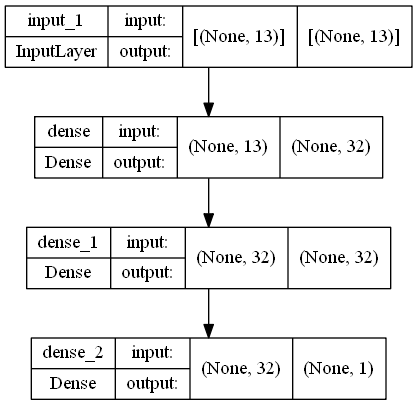

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### 로지스틱회귀 - Functional API
- **Dense(32, activation='relu')**
- input - hl1 - hl2 - output
- hl2는 hl1보다 고수준

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x.shape, y.shape

((569, 30), (569,))

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2022)

x_train.shape, y_train.shape

((398, 30), (398,))

In [15]:
##########
# 모델링 #
##########

# 청소
keras.backend.clear_session()

# 모델 연결
il = keras.layers.Input(shape=(30,))
hl = keras.layers.Dense(32, activation='relu')(il)
hl = keras.layers.Dense(32, activation='relu')(hl)
ol = keras.layers.Dense(1, activation='sigmoid')(hl)

# 모델 선언(처음, 끝)
model = keras.models.Model(il, ol)

# 모델 설정
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'], optimizer='adam')

In [16]:
model.fit(x_train,y_train, epochs=10, verbose=1)

y_pred = model.predict(x_test)

Epoch 1/10
13/13 [==============================] - 0s 2ms/step - loss: 6.0130 - accuracy: 0.5729
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 1.7230 - accuracy: 0.7337
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.8920
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.8794
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.8970
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.9146
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.9095
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.2908 - accuracy: 0.9121
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.8945
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9196


In [18]:
print(y_test[:5])
print(y_pred[:5].reshape(-1))

[1 1 0 1 1]
[0.9806615  0.9979324  0.99199855 0.9968132  0.9963876 ]


In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


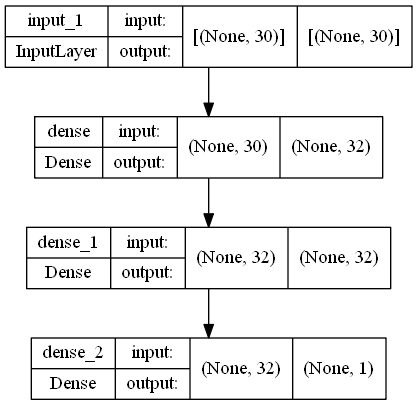

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)